### Plotting snapshots of  llc4320 surface speed and vertical vorticity

In [71]:
import numpy as np
import sys
sys.path.append("../src/")

import matplotlib.pyplot as plt 
%matplotlib inline

from mpl_toolkits.basemap import Basemap
from netCDF4 import Dataset

import seawater as sw

In [72]:
plt.rcParams.update({'font.size': 25, 'legend.handlelength'  : 1.5
    , 'legend.markerscale': 1.})
plt.rc('xtick', labelsize=25) 
plt.rc('ytick', labelsize=25)

In [73]:
lw1=4
aph=.7
sc = 20.

In [74]:
import dp_map
dpmap = dp_map.drake_passage_map(fig_label="b",fig_title="llc 4320 simulation")
m = dpmap.m

In [75]:
data_path = 'uv_0m_single_file.nc'
data = Dataset(data_path)

auxt = np.load('/Users/crocha/Dropbox/research/mitgcm/drake/subsets/eta_919_1440.npz')

In [76]:
flat = (data.variables['lat'][:] > -62) & (data.variables['lat'][:] < -55)
lon,lat = np.meshgrid(data.variables['lon'],data.variables['lat'][:][flat])
lon,lat = m(lon,lat)

In [77]:
time = auxt['time']

Topography

In [78]:
topo = np.load("../topo/topo_dp.npz")
lont,latt,zt = topo['lon'],topo['lat'],topo['topo']

In [79]:
dec = 2
lont = lont[::dec]
latt = latt[::dec]
zt = zt[::dec,::dec]
lonti,latti = np.meshgrid(lont,latt)
xgt,ygt = m(lonti,latti)

flat = (data.variables['lat'][:] > -62) & (data.variables['lat'][:] < -55)
loni,lati = np.meshgrid(data.variables['lon'],data.variables['lat'][:][flat])
ix,jx = loni.shape
DX = np.empty((ix-1,jx))
DY = np.empty((ix,jx-1))
for i in range(ix):
    DY[i,:],_ = sw.dist(lati[i,:],loni[i,:])
for j in range(jx):
    DX[:,j],_ = sw.dist(lati[:,j],loni[:,j])
    
dx, dy = DX.mean(), DY.mean()

f = np.abs(sw.f(lati))

In [80]:
def plt_speed_vorticity(it):
 
    # calculate speed and vorticity
    u, v = data.variables['u'][flat,:,it], data.variables['v'][flat,:,it]

    speed = np.sqrt(u**2 + v**2)
    speed = np.ma.masked_array(speed,speed>1.26)
    
    ux,uy = np.gradient(u,dx,dy)
    vx,vy = np.gradient(v,dx,dy)
    zeta = vy - ux
    zeta = zeta/1.e3/f
    
    fig = plt.figure(facecolor='w', figsize=(16.,7))

    plt.subplot(121)
    
    plt.title(str(time[it]))

    pc = m.pcolor(lon,lat,speed,cmap='afmhot',vmin=0,vmax=1.26)
    m.fillcontinents(color='.60',lake_color='none')
    dpmap.draw_par_mer()
    m.drawcoastlines()

    
    #axColor = plt.axes([.55,.225,.25,.035])
    #cb = plt.colorbar(pc, cax = axColor, orientation="horizontal",
    #                extend='both')
    cb = plt.colorbar(orientation="horizontal",extend='both',shrink=.75)
    cb.set_label(u'Surface speed [m s$^{-1}$]',fontsize=17)
    cb.set_ticks(np.arange(0,1.6,.4))
    cb.ax.tick_params(labelsize=17) 
    
    plt.subplot(122)

    plt.title(str(time[it]))
    
    pc = m.pcolor(lon[::dec],lat[::dec],zeta[::dec],cmap='coolwarm',vmin=-.5,vmax=.5)

    m.fillcontinents(color='.60',lake_color='none')
    dpmap.draw_par_mer()
    m.drawcoastlines()
    
    #axColor = plt.axes([.57,.3,.25,.035])
    #cb2 = plt.colorbar(pc, cax = axColor, orientation="horizontal",
    #              extend='both')
    cb2 = plt.colorbar(orientation="horizontal",extend='both',shrink=.75)
    cb2.set_label(u'Surface vorticity $\zeta/|f|$',fontsize=17)
    cb2.set_ticks(np.arange(-5.,1.,.5))
    cb2.ax.tick_params(labelsize=17)
    
    plt.savefig('figs/model_snapshot_speed_vorticity_'+str(time[it]),dpi=300,bbox_inches='tight')

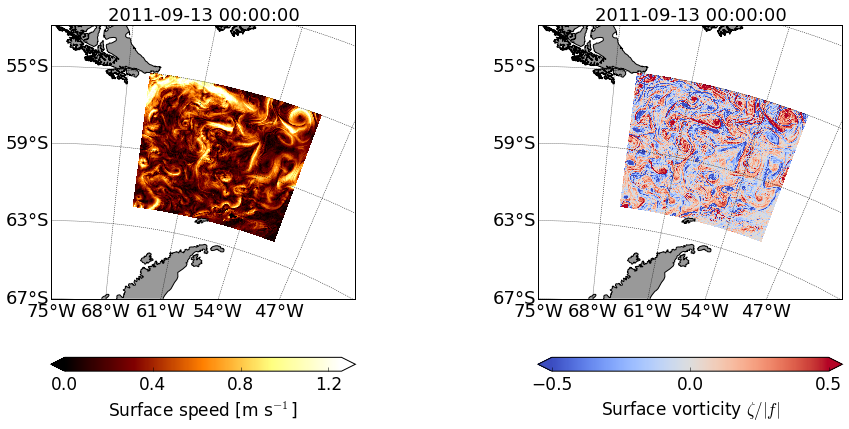

In [81]:
plt_speed_vorticity(it=0)

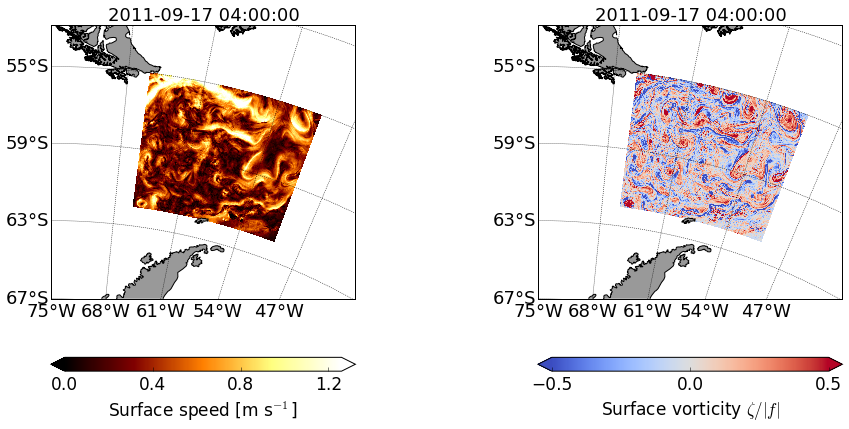

In [82]:
plt_speed_vorticity(it=100)

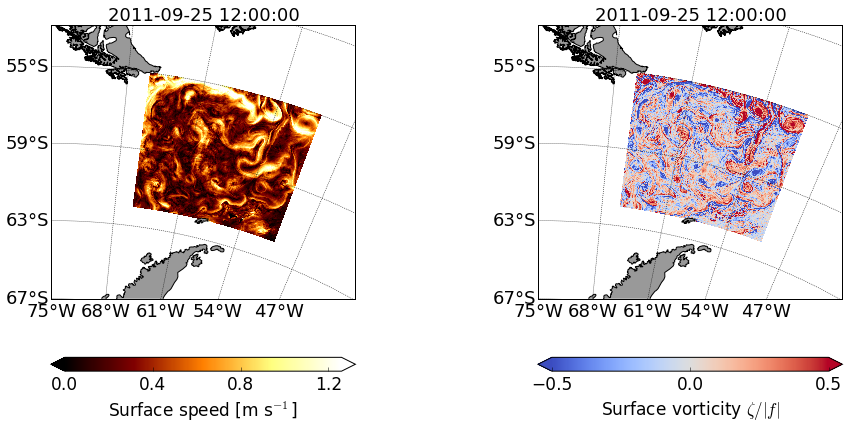

In [83]:
plt_speed_vorticity(it=300)

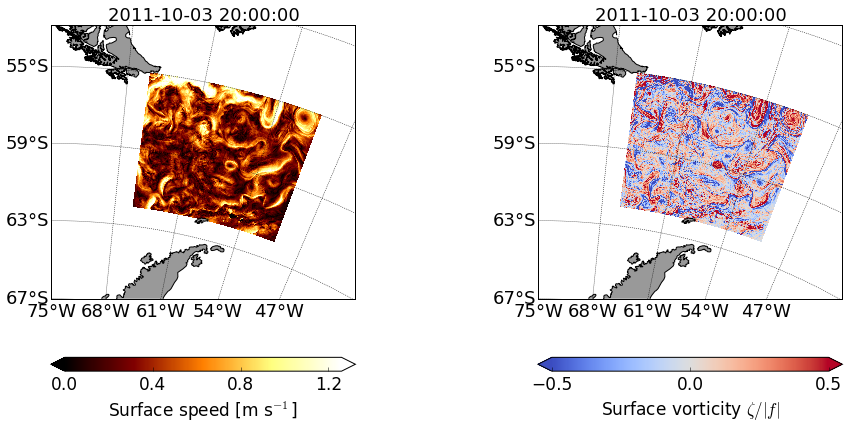

In [84]:
plt_speed_vorticity(it=500)

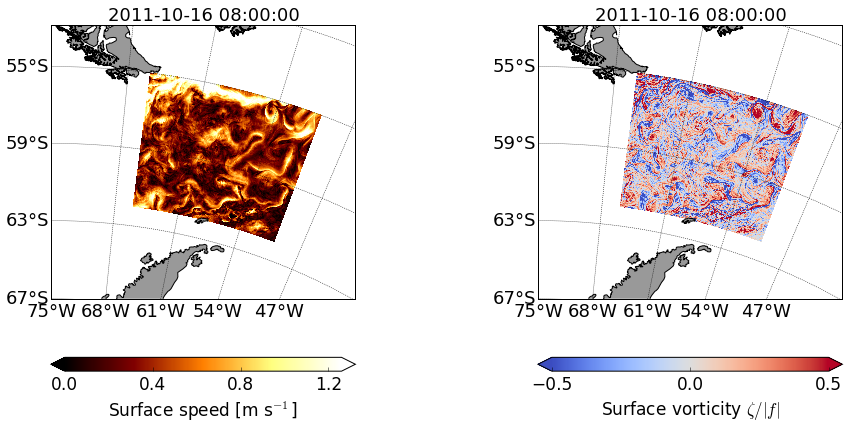

In [85]:
plt_speed_vorticity(it=800)

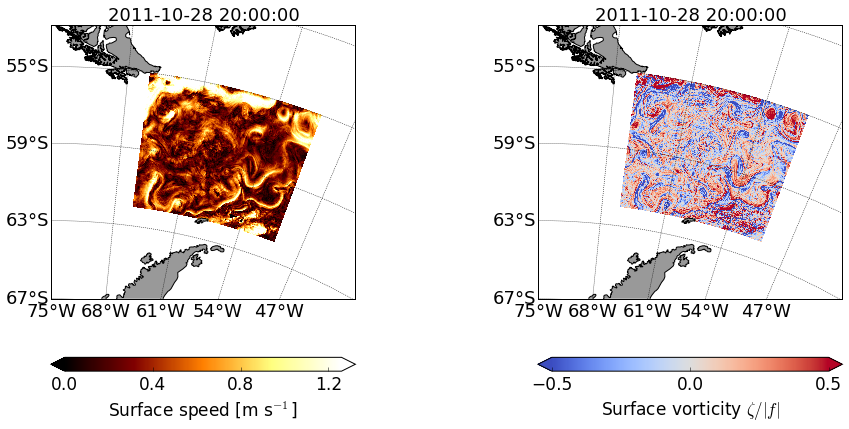

In [86]:
plt_speed_vorticity(it=1100)

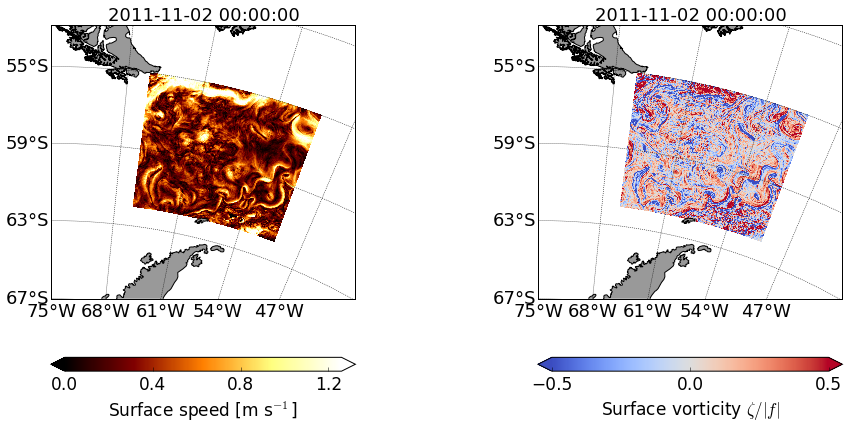

In [87]:
plt_speed_vorticity(it=1200)

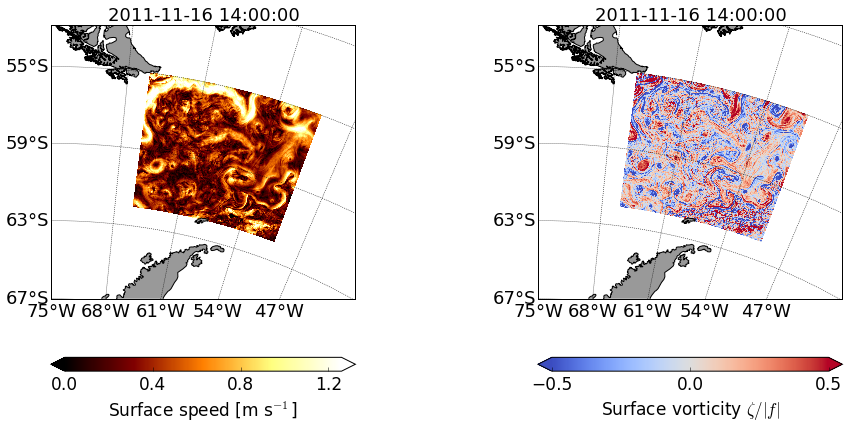

In [91]:
plt_speed_vorticity(it=1550)

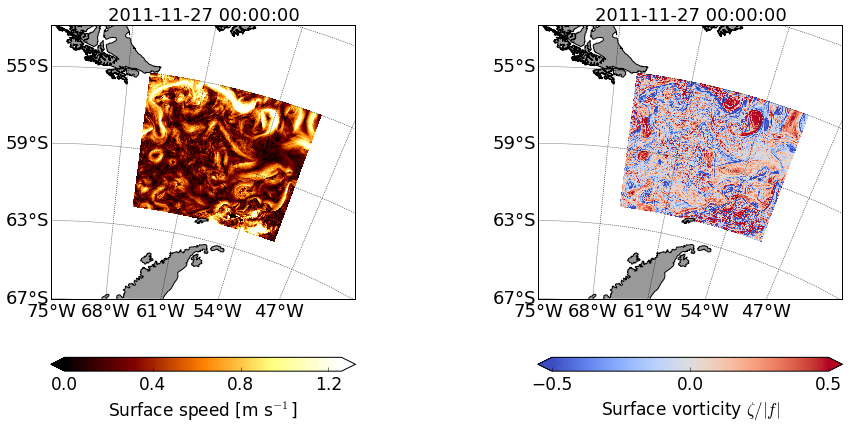

In [89]:
plt_speed_vorticity(it=1800)